## Delhi Metro Neighborhood Classificaiton

### Introduction

##### Delhi Metro is a rapid transit system servicing Delhi and its satellite cities in the National Capital Region of India. It is the largest Metro Network in India and its network consists of 11 color coded lines covering 285 stations. Delhi Metro Operates over 2700 trips daily. 

##### The focus of this project would be to analyze the neighborhood surrounding Delhi Metro stations and classify them as residential, leisure or commercial spaces. This classification could help the planners understand what would be the busy routes during particular hours of the day and what new area can be developed as a business or residential area. This data can be used for the tourists to locate the best place to stay while on a trip or to plan their day trips in and around Delhi. 

##### Delhi Metro is the primary means of commute for a large working population so this user base could use the study results to search for best locations to live, that would be near to work location, Shopping centers and schools. 

### Data

##### The Data points that would be needed to solve the problem is listed below
-	List of Delhi Metro stations and their geographical coordinates
-	Venue data related to the Delhi Metro Neighborhoods



### Data Extraction

-	Scrapping of Delhi Metro station data from Wikipedia
-	Getting Latitude and Longitude data
-	Getting Venue Data from Foursquare API


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Extract the list of Delhi Metro Stations and their geographical Coordinates

# list of Delhi Metro Station and its Co-ordinates is available on Github link below
# https://github.com/dhirajt/delhi-metro-stations/blob/master/metro.json
# We will download and use this Json file 

In [2]:
# Read the coordinates json

# Delhi_metro_df = pd.read_json(r'C:\Users\deependra_singh03\Downloads\output.json')

# Rearrange the columns 
#  Delhi_metro_df = Delhi_metro_df[['name','layout','line','longitude','latitude','Coordinates']]

Delhi_metro_df=pd.read_excel(r'C:\Users\deependra_singh03\Downloads\output1.xlsx')
Delhi_metro_df

,name,layout,line,latitude,longitude,Coordinates
0,Adarsh Nagar,Underground,Yellow Line,28.71642,77.17046,"28.71642,77.17046"
1,AIIMS,Underground,Yellow Line,28.56892,77.20771,"28.56892,77.20771"
2,Akshardham,Elevated,Blue Line,28.61806,77.27869,"28.61806,77.27869"
3,Anand Vihar,Elevated,Blue Line branch,28.64695,77.31603,"28.64695,77.31603"
4,Arjan Garh,Elevated,Yellow Line,28.48076,77.12583,"28.48076,77.12583"
5,Ashok Park Main,Elevated,Green Line,28.67153,77.15527,"28.67153,77.15527"
6,Azadpur,Underground,Yellow Line,28.70696,77.18053,"28.70696,77.18053"
7,Badarpur,Elevated,Violet Line,28.49334,77.30307,"28.49334,77.30307"
8,Barakhambha Road,Underground,Blue Line,28.63003,77.22436,"28.63003,77.22436"
9,Botanical Garden,Elevated,Blue Line,28.56409,77.33420,"28.56409,77.33420"


##### Visualize the Station Data by drawing the stations and the lines

In [3]:
# list the Unique Lines
Delhi_metro_df.line.unique()

array(['Yellow Line', 'Blue Line', 'Blue Line branch', 'Green Line',
       'Violet Line', 'Airport Express', 'Red Line', 'Green Line branch'],
      dtype=object)

In [4]:
# Assign Color to all lines

# Line color codes
line_colors = {
    'Yellow Line':'#FCFF33',
    'Blue Line':'#3374FF',
    'Blue Line branch':'#3933FF',
    'Green Line':'#4CFF33',
    'Violet Line':'#',
    'Airport Express':'#FF3333',
    'Red Line':'#FF3F33',
    'Green Line branch':'#33FF6B'
}

#create map of Delhi( National Capital Region) with all stations
map_delhi_metro = folium.Map(location=[28.6448, 77.1025], zoom_start=10)
map_delhi_metro

In [5]:
#add markers

for line, station, coordinates in zip(Delhi_metro_df['line'], Delhi_metro_df['name'], Delhi_metro_df['Coordinates']):
    latlong = [float(x) for x in coordinates.split(',')]
    #Add marker with popup
    folium.Circle(
        latlong,
        popup=station,
        radius=20,
        color=line_colors[line]
    ).add_to(map_delhi_metro)
    prev_coordinates = None
    prev_line = '1'
    if line != prev_line:
        prev_coordinates = None    
    if prev_coordinates != None:
        folium.PolyLine([prev_coordinates, latlong], color=line_colors[line]).add_to(map_delhi_metro)    
    prev_line = line
    prev_coordinates = latlong    

def draw_lines(dataframe, map_object, opacity=1):
    prev_coordinates = None
    prev_line = '1'
    for line, coordinates in zip(dataframe['line'], dataframe['Coordinates']):
        latlong = [float(x) for x in coordinates.split(',')]
        #don't draw line if line number changed
        prev_line = 0
        if line != prev_line:
            prev_coordinates = None
        if prev_coordinates != None:
            folium.PolyLine([prev_coordinates, latlong], color=line_colors[line], opacity=opacity).add_to(map_object)
        prev_line = line
        prev_coordinates = latlong    
draw_lines(Delhi_metro_df, map_delhi_metro)
map_delhi_metro


## Venues and categories

Foursquare API would be used to explore venue categories surrounding each station. Venues can be categorized as residential, professional, shopping or leisure. Let's get the list of venue categories from Foursquare API

In [6]:
CLIENT_ID = 'UTWMTXMM2VTMFKUZGXCIXK4BODGS301TAQULBAAYYUDGJGVO' # your Foursquare ID
CLIENT_SECRET = 'ZUQQAJREJHEQKVKPU4PXL0VNUIJNDRUYZP4B25ZSXZPYPHZ5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [7]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [9]:
len(results['response']['categories'])

10

There are 10 top-level categories and multiple subcategories

In [10]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


## Methodology

##### We can use the foursquare explore API with categoryId to query the number of venues of each category in a specific radius. The response contains a totalResults value for the specified coordinates, radius and category.

In [17]:
def get_venues_count(ll, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [20]:
#Create new dataframe to store venues data
stations_venues_df = Delhi_metro_df.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0

In [38]:
#Request number of venues, store result as CSV
i=0
for i, row in stations_venues_df.iterrows():
    print(i)
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Coordinates.iloc[i], radius=1000, categoryId=c[1])
        response = requests.get(explore_url).json()
    stations_venues_df.to_csv('stations_venues.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


3

In [40]:
#Read already stored CSV
stations_venues_df = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues_df.head()

,name,layout,line,latitude,longitude,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adarsh Nagar,Underground,Yellow Line,28.71642,77.17046,"28.71642,77.17046",0,0,0,5,0,1,5,0,12,3
1,AIIMS,Underground,Yellow Line,28.56892,77.20771,"28.56892,77.20771",3,4,1,10,5,2,8,3,5,2
2,Akshardham,Elevated,Blue Line,28.61806,77.27869,"28.61806,77.27869",1,5,0,4,0,10,3,2,3,2
3,Anand Vihar,Elevated,Blue Line branch,28.64695,77.31603,"28.64695,77.31603",3,2,0,8,2,1,12,1,12,6
4,Arjan Garh,Elevated,Yellow Line,28.48076,77.12583,"28.48076,77.12583",2,1,0,2,0,2,6,0,4,3


## Exploratory analysis & basic cleanup
##### Plot the number of venues as boxplots

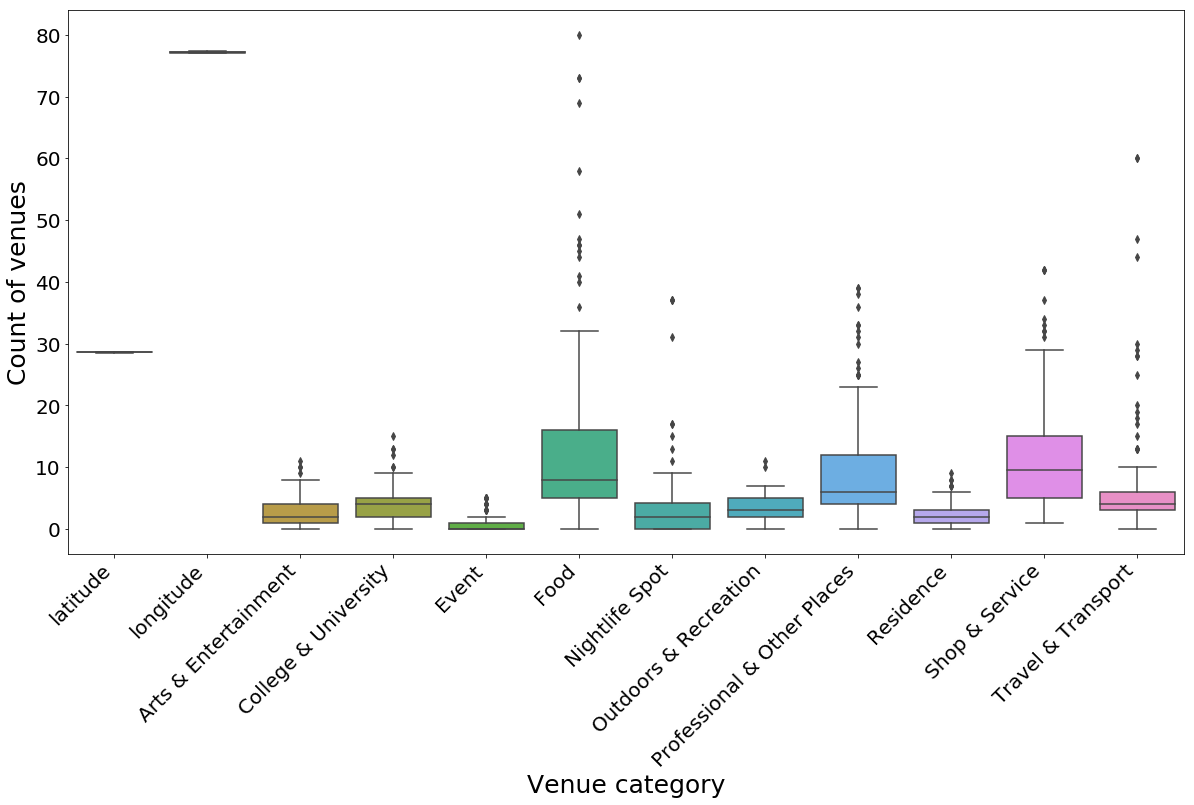

In [41]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues_df)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

The most frequent venue categories are professional, shop&service and food. Event has very little data, let's discard it from both the dataframe and the list of categories.

In [42]:
stations_venues_df.drop('Event', 1, inplace=True)

In [43]:
categories_list = list(filter(lambda x: x[0] != 'Event', categories_list))

In [47]:
stations_venues_df

,name,layout,line,latitude,longitude,Coordinates,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adarsh Nagar,Underground,Yellow Line,28.71642,77.17046,"28.71642,77.17046",0,0,5,0,1,5,0,12,3
1,AIIMS,Underground,Yellow Line,28.56892,77.20771,"28.56892,77.20771",3,4,10,5,2,8,3,5,2
2,Akshardham,Elevated,Blue Line,28.61806,77.27869,"28.61806,77.27869",1,5,4,0,10,3,2,3,2
3,Anand Vihar,Elevated,Blue Line branch,28.64695,77.31603,"28.64695,77.31603",3,2,8,2,1,12,1,12,6
4,Arjan Garh,Elevated,Yellow Line,28.48076,77.12583,"28.48076,77.12583",2,1,2,0,2,6,0,4,3
5,Ashok Park Main,Elevated,Green Line,28.67153,77.15527,"28.67153,77.15527",0,3,4,0,1,9,1,6,2
6,Azadpur,Underground,Yellow Line,28.70696,77.18053,"28.70696,77.18053",1,4,8,0,2,9,3,2,3
7,Badarpur,Elevated,Violet Line,28.49334,77.30307,"28.49334,77.30307",1,3,2,0,0,6,0,14,3
8,Barakhambha Road,Underground,Blue Line,28.63003,77.22436,"28.63003,77.22436",11,3,80,37,7,25,3,42,20
9,Botanical Garden,Elevated,Blue Line,28.56409,77.33420,"28.56409,77.33420",4,4,27,7,3,4,2,26,4


## Data preparation

##### Let's normalize the data using MinMaxScaler (scale from 0 to 1). This scales the data and provides an easy to interpret score at the same time.

In [48]:
from sklearn.preprocessing import MinMaxScaler

X = stations_venues_df.values[:,6:]
cluster_dataset = MinMaxScaler().fit_transform(X)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.000000,0.000000,0.0625,0.000000,0.090909,0.128205,0.000000,0.268293,0.050000
1,0.272727,0.266667,0.1250,0.135135,0.181818,0.205128,0.333333,0.097561,0.033333
2,0.090909,0.333333,0.0500,0.000000,0.909091,0.076923,0.222222,0.048780,0.033333
3,0.272727,0.133333,0.1000,0.054054,0.090909,0.307692,0.111111,0.268293,0.100000
4,0.181818,0.066667,0.0250,0.000000,0.181818,0.153846,0.000000,0.073171,0.050000


Visualize the scaled data.

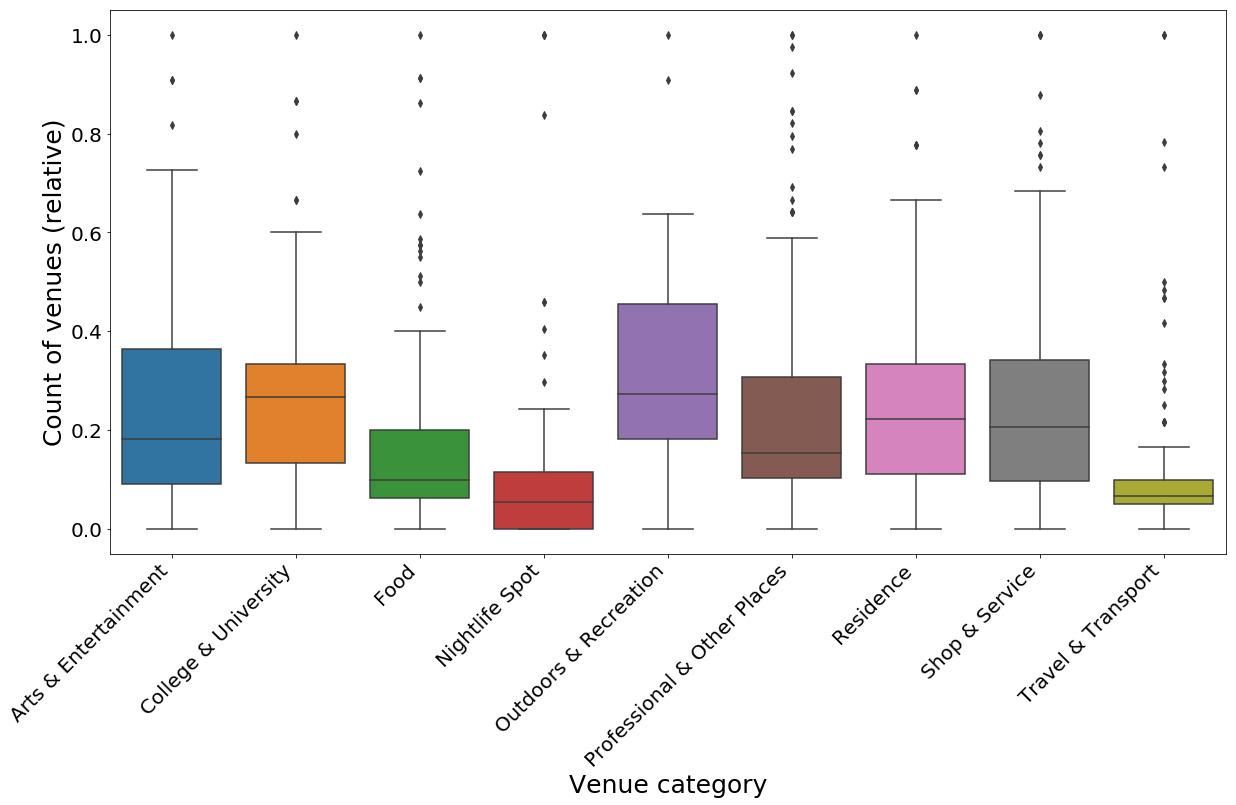

In [50]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

## Clustering
##### We'll be using k-means clustering. These were preliminary results with different number of clusters:

2 clusters only show the uptown/downtown divide
3 clusters add clustering within the downtown
4 clusters also identify neighborhoods with very low number of venues
5 and more clusters are difficult to interpret
For the final analysis let's settle on 4 clusters.

In [53]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['name'] = Delhi_metro_df['name']
stations_clusters_minmax_df['Coordinates'] = Delhi_metro_df['Coordinates']

Visualize the clusters with boxplots

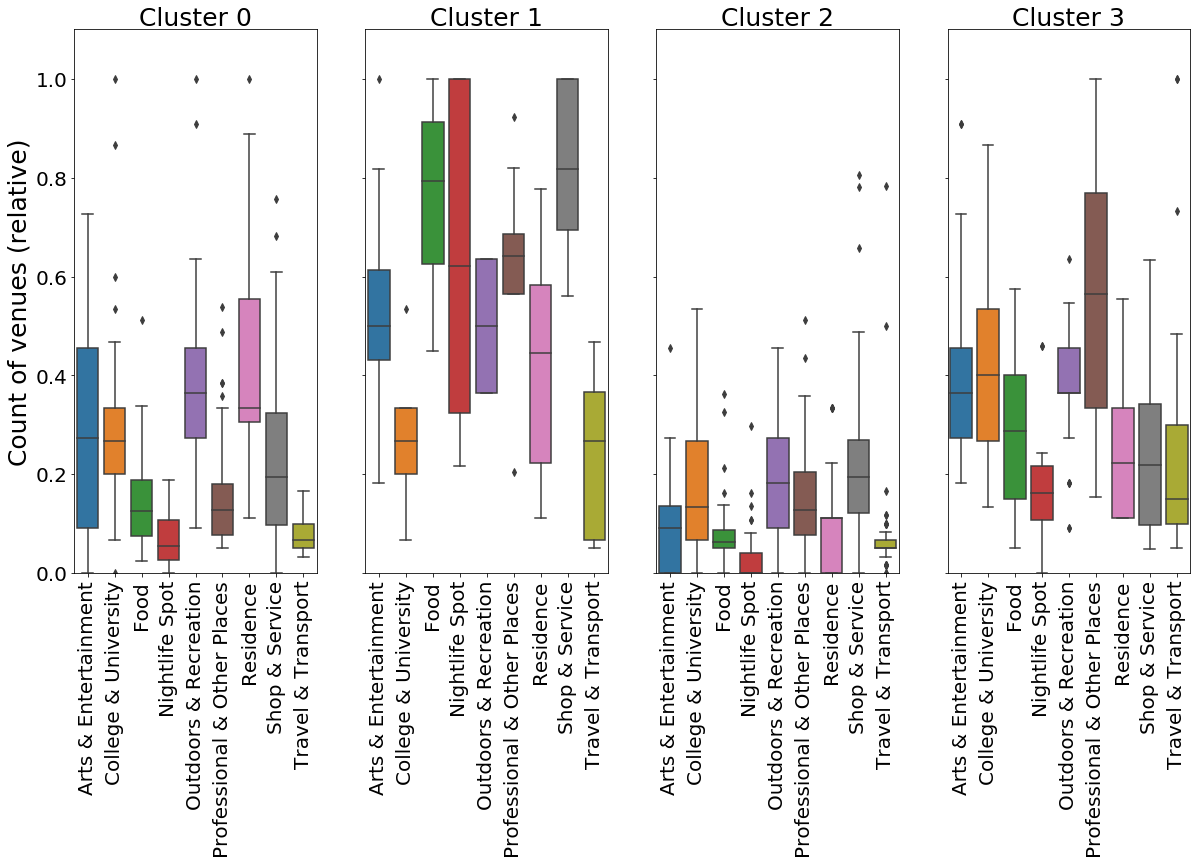

In [54]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

Map the data. For each station we'll display top 3 venue categories.

In [55]:
#create map of Delhi with all stations

map_delhi_metro = folium.Map(location=[28.6448, 77.1025], zoom_start=10)
draw_lines(Delhi_metro_df, map_delhi_metro, 0.9)

#add markers
for i, station, coordinates, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['name'],
                                         stations_clusters_minmax_df['Coordinates'],
                                         stations_clusters_minmax_df['Cluster']):
    latlong = [float(x) for x in coordinates.split(',')]    
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','orange','red']
    #Calculate top 3 categories for each station
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        latlong,
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(map_delhi_metro)
    
map_delhi_metro

In [57]:
map_delhi_metro.save('index.html')

Results

Here is how we can characterize the clusters by looking at venue scores

Cluster 0 (Blue) has consistently average scores for all venue categories. This seems to be a developing area of the city.  

Cluster 1 (Green) has highest marks for Nighlife Spots, shops and Services and food. This is the business part of the city. 

Cluster 2 (Orange) has low marks across the board. These appear to be the old parts of the city.  

Cluster 3 (Red) has best scores in Profiessional and College and University.

Plotting the clusters on a map shows us that

Cluster 0 (Blue) seems to be the developing areas 

Cluster 1 (Green) seems to be the heart of the city and since venues are milited it seems to be the expensive locality of the Delhi

Cluster 2 (Orange) are the old parts of the city and the less affluent areas in terms of speding capacity 

Cluster 3 (Red) seems to be the professional area of the city with most offices and is surrounding the green clusters

## Discussion

##### I would like to highlight some shortcomings in the Foursquare Data for e.g. the highest number of venues are in the Food and Shop & Service categories. The data also does not take into venue’s size (e.g. a university building attracts a lot more people that a hot dog stand – each of them is still one Foursquare “venue”), venue count alone is not a good estimaiton point. 

## Conclusion

##### Foursquare data is helpful in provinding insignt into city’s development. This data could be combined with other data sources (e.g. city data on number of residents) to provide more valuable results.